<a href="https://colab.research.google.com/github/ianravisingh/Tensorflow-2.0/blob/main/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Loading & Training

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
# load the data
data = load_breast_cancer()

In [4]:
# check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [5]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# evaluate the model
print('Train score: ', model.evaluate(X_train, y_train))
print('Test score: ', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 1.0095 - accuracy: 0.3176 - val_loss: 0.9825 - val_accuracy: 0.3191
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9116 - accuracy: 0.3753 - val_loss: 0.8876 - val_accuracy: 0.4043
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8245 - accuracy: 0.4488 - val_loss: 0.8023 - val_accuracy: 0.5053
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7472 - accuracy: 0.5118 - val_loss: 0.7276 - val_accuracy: 0.5532
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6806 - accuracy: 0.5879 - val_loss: 0.6629 - val_accuracy: 0.5904
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6229 - accuracy: 0.6588 - val_loss: 0.6077 - val_accuracy: 0.6809
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7244 - val_loss: 0.5611 - val_accuracy: 0.7340
Epoch 8/100


In [15]:
import matplotlib.pyplot as plt

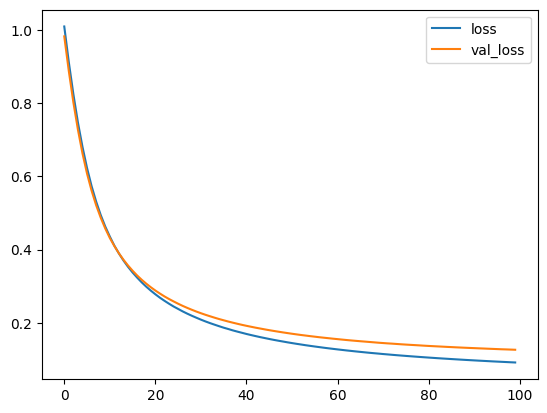

In [16]:
# loss plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

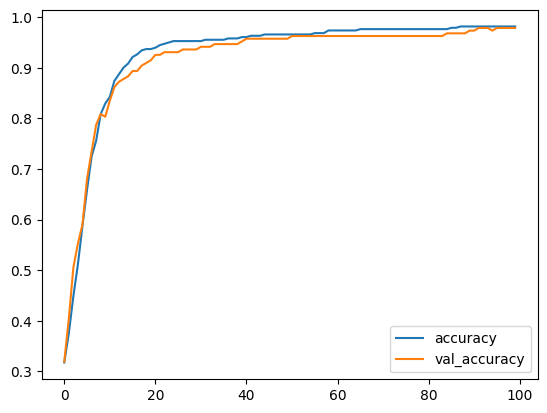

In [17]:
# accuracy plot
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Part 2: Making Predictions

In [18]:
# Make predictions
p = model.predict(X_test)
print(p) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

6/6 [==============================] - 0s 2ms/step
[[9.4583946e-01]
 [8.7835014e-01]
 [1.6418249e-04]
 [4.5276567e-02]
 [9.9622798e-01]
 [1.3958864e-03]
 [9.8843056e-01]
 [8.9798731e-01]
 [1.7660936e-02]
 [1.9009273e-03]
 [2.2112264e-03]
 [9.8882836e-01]
 [9.8612833e-01]
 [9.4939667e-01]
 [7.6062471e-01]
 [8.4887490e-02]
 [7.1491492e-01]
 [9.8671579e-01]
 [9.8340023e-01]
 [5.9780438e-04]
 [1.7076739e-04]
 [2.1492144e-01]
 [9.1391605e-01]
 [7.5308526e-01]
 [9.9505377e-01]
 [8.9212853e-01]
 [7.1178980e-02]
 [9.8436242e-01]
 [9.9300092e-01]
 [1.4859872e-02]
 [3.1275168e-01]
 [9.9581552e-01]
 [9.7069520e-01]
 [2.2801796e-02]
 [9.5232755e-01]
 [9.1153431e-01]
 [9.9589574e-01]
 [9.8496896e-01]
 [2.4694626e-03]
 [2.5059056e-01]
 [2.0411061e-03]
 [9.7633839e-01]
 [1.1107915e-06]
 [9.3203684e-04]
 [9.8135763e-01]
 [9.9814099e-01]
 [2.6001607e-04]
 [8.6039811e-01]
 [7.7913737e-01]
 [8.1793219e-01]
 [3.0507860e-01]
 [1.4521734e-05]
 [9.7327489e-01]
 [9.9222481e-01]
 [3.4830341e-01]
 [1.0993871e-0

In [19]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(p).flatten()
print(P)

[1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.]


In [21]:
# manually calculate accuracy and compare it with evaluate() method
print('Manually calculated accuracy: ', np.mean(y_test==P))
print('Evaluate output: ', model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9787234042553191
6/6 [==============================] - 0s 5ms/step - loss: 0.1266 - accuracy: 0.9787
Evaluate output:  [0.12657155096530914, 0.978723406791687]


## Part 3: Saving and loading the model

In [23]:
model.save('linearclassifier.h5') # legacy format
model.save('linearclassifier.keras') # native keras format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# check that the model file exists
!ls -lh

total 44K
-rw-r--r-- 1 root root  20K Jan  7 04:20 linearclassifier.h5
-rw-r--r-- 1 root root  17K Jan  7 04:20 linearclassifier.keras
drwxr-xr-x 1 root root 4.0K Jan  4 14:21 sample_data


In [25]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
saved_model = tf.keras.models.load_model('linearclassifier.h5') # loading via hdfs
print(saved_model.layers)
saved_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1266 - accuracy: 0.9787


[0.12657155096530914, 0.978723406791687]

In [26]:
saved_model = tf.keras.models.load_model('linearclassifier.keras') # loading via keras
print(saved_model.layers)
saved_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.9787


[0.12657155096530914, 0.978723406791687]

In [ ]:
# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linearclassifier.h5')